In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


In [131]:
train= pd.read_csv("bigmart_train.csv")
test= pd.read_csv("bigmart_test.csv")

In [132]:
train.shape


(8523, 12)

In [133]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [134]:
test.shape

(5681, 11)

In [135]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [136]:
# combine test and train into  one file in order to do the eda 
train["source"]="train"
test["source"]="test"
data=pd.concat([train, test],ignore_index=True)
print(data.shape)

(14204, 13)


In [137]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [138]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [139]:
# checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [140]:
#print the unique values in the item_fat_content column, where there are only two unique types of fat content in intems;: low fat and regular
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [141]:
#print the unique values in the Outlet_Establishment_Year column, where the data ranges from 1985 to 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [142]:
#calculate the outlate_age
data["Outlet_age"]=2023- data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [143]:
#printing the count value of item_fat_content
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [144]:
# we can see that the low_fat products are the most abundant


In [145]:
#print the count_value of Outlet_size
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [146]:
# the majority of outlet size are medium and small scale outlets

In [147]:
#use the mode function to find out the most common value in Outlet_size
data["Outlet_Size"].mode()[0]

'Medium'

In [148]:
#Replacing missing values in outlet_size with the value medium
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"]).mode()[0]

In [149]:
#Replacing missing values in Item_Weight with the mean Weight
data["Item_Weight"]= data["Item_Weight"].fillna(data["Item_Weight"].mean())

<AxesSubplot:>

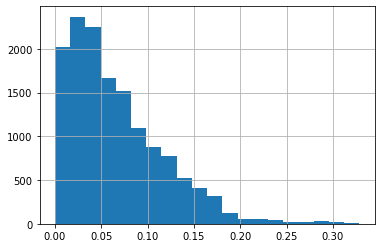

In [150]:
#plot a histogram to reveal the distribution of item_visibility column
data["Item_Visibility"].hist(bins=20)
# bins is used to specfy the bar width

In [151]:
# detecting outliers
# calculate the first quantile for item_visibility
Q1=data["Item_Visibility"].quantile(0.25)

In [152]:
#calculate the second quantile
Q3= data["Item_Visibility"].quantile(0.75)

In [153]:
#calulate the interquartile range(IQR)
IQR=Q3-Q1

In [154]:
#Now that the IQR range is known let's remove the outliers from the data
#the resulting data is stored in fill_data variable
fill_data=data.query('(@Q1 - 1.5* @IQR)<= Item_Visibility <= (@Q3+1.5*@IQR)')
fill_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Medium,Tier 3,Supermarket Type1,994.7052,train,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Medium,Tier 1,Supermarket Type1,NaN,test,26
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,14
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,21
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,16


In [155]:
# check the shape if the resulting dataset without the outliers
fill_data.shape

(13943, 14)

In [156]:
#assign fill-data dataset to data dataframe
data=fill_data

In [157]:
data.shape

(13943, 14)

In [158]:
#modify item_visibility by converting the numerical values into the categories low visibility, visibility and high visibility 
data["Item_Visibility_bins"]=pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High Viz'])

In [159]:
data["Item_Visibility_bins"]

0         Low Viz
1         Low Viz
2         Low Viz
3             NaN
4             NaN
           ...   
14199     Low Viz
14200    High Viz
14201         Viz
14202         NaN
14203         Viz
Name: Item_Visibility_bins, Length: 13943, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [160]:
#print the count of item_visibility_bins
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [161]:
#Replace the null values with low visibility
data["Item_Visibility_bins"]=data["Item_Visibility_bins"].replace(np.nan,"Low Viz",regex=True)

In [162]:
data["Item_Visibility_bins"]

0         Low Viz
1         Low Viz
2         Low Viz
3             NaN
4             NaN
           ...   
14199     Low Viz
14200    High Viz
14201         Viz
14202         NaN
14203         Viz
Name: Item_Visibility_bins, Length: 13943, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [163]:
,#We foun typos and differences in representation in categories of item_fat_content variable
#replace all other represnetations of low fat to Low Fat
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["low fat","LF"],"Low Fat")

In [164]:
#replace all presentations of reg to regular
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["reg","Regular"],"Regular")

In [165]:
#print unique fat count values
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [166]:
#code all categorical variables as numeric using labelEncoder from sklearn's preprocessing module
#initialize the label encoder
le=LabelEncoder()

In [167]:
#Transform item fat_content
data["Item_Fat_Content"]=le.fit_transform(data["Item_Fat_Content"])

In [168]:
#Transform item visibility_bins
data["Item_Visibility_bins"]=le.fit_transform(data["Item_Visibility_bins"])

In [169]:
#Transform outlet_size
data["Outlet_Size"]=le.fit_transform(data["Outlet_Size"])

In [170]:
#transform outlet_location_tyoe
data["Outlet_Location_Type"]=le.fit_transform(data["Outlet_Location_Type"])

In [171]:
#print the unique values of outlet_location_type
data["Outlet_Location_Type"].unique()

array([0, 2, 1])

In [172]:
#create dummies for outlet_type
dummy=pd.get_dummies(data["Outlet_Type"])

In [173]:
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [174]:
#Explore the column item_identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [175]:
#there are multiple values of food, nonconsumable items, and drinks with different numbers , combine the item type
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [176]:
#As multiple categories are present in Item_Identifier, reduce this by mapping
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [177]:
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [178]:
data.shape

(13943, 16)

In [179]:
#perform one-hot encoding for all columns as the model works on numerical values and not on categorical values
data=pd.get_dummies(data, columns=["Item_Fat_Content","Outlet_Size","Outlet_Type","Item_Type_Combined"])

In [180]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Outlet_Location_Type                   int32
Item_Outlet_Sales                    float64
source                                object
Outlet_age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Size_0                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_Combined_Food                uint8
Item_Type_Combined_Non-Consumable      uint8
dtype: obj

In [181]:
#Drop the columns which have been converted to different types
data.drop(["Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)
#Divide the dataset created earlier into train and test datasets
train=data.loc[data["source"]=="train"]
test=data.loc[data["source"]=="test"]

#Drop unnecessary columns
test.drop(["Item_Outlet_Sales","source"],axis=1,inplace=True)
train.drop(["source"],axis=1,inplace=True)

#Export modified versions of the files
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)


In [182]:
#Read the train_modified.csv and test_modified.csv
train2=pd.read_csv("train_modified.csv")
test2=pd.read_csv("test_modified.csv")

In [183]:
#print the data types of train2 column
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Location_Type                   int64
Item_Outlet_Sales                    float64
Outlet_age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Size_0                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_Combined_Non-Consumable      int64
dtype: object

In [184]:
#Drop the irrelevant variables from train2 dataset
#create the independent variable x_train and dependent variable y_train 
X_train=train2.drop(["Item_Outlet_Sales","Outlet_Identifier","Item_Identifier"],axis=1)
y_train=train2.Item_Outlet_Sales

In [185]:
#Drop the irrelevant variables from test2 dataset
X_test=test2.drop(["Outlet_Identifier","Item_Identifier"],axis=1)

In [186]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type,Outlet_age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,0,24,1,1,0,1,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,1,16,1,0,1,1,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,2,25,2,1,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,1,16,1,1,0,1,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,2,38,2,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,0,26,1,0,1,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,2,14,0,0,1,1,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,1,21,2,1,0,1,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,1,16,3,0,1,1,0,1,0,0,0,1,0


In [187]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type,Outlet_age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.300,0.016047,249.8092,0,24,1,1,0,1,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,2,14,1,0,1,1,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,0,24,1,1,0,1,0,1,0,0,0,1,0
3,19.200,0.000000,182.0950,2,25,3,0,1,1,1,0,0,0,0,1,0
4,8.930,0.000000,53.8614,2,36,3,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,6.865,0.056783,214.5218,2,36,1,1,0,1,0,1,0,0,0,1,0
8371,8.380,0.046982,108.1570,1,21,1,0,1,1,0,1,0,0,0,1,0
8372,10.600,0.035186,85.1224,1,19,1,1,0,1,0,1,0,0,0,0,1
8373,7.210,0.145221,103.1332,2,14,0,0,1,1,0,0,1,0,0,1,0


In [188]:
y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8370    2778.3834
8371     549.2850
8372    1193.1136
8373    1845.5976
8374     765.6700
Name: Item_Outlet_Sales, Length: 8375, dtype: float64

In [189]:
#import sklearn libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [190]:
#create a train and test split
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [191]:
#Fit the linear regression to the trainsing dataset
lin=LinearRegression()

In [192]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [193]:
#Find the coefficient and intercept of the line
#Use xtrainand ytrain for linear Regression
print(lin.coef_)
print(lin.intercept_)

[-1.87583349e+00 -3.31920816e+02  1.58736517e+01  5.18760250e+00
 -1.33064391e+00 -4.72471852e+00 -7.61344515e-01  7.61344515e-01
 -3.69482223e-13 -1.70167103e+03  2.50052593e+02 -1.36306644e+02
  1.58792508e+03  8.14834402e+00  3.55893910e+01 -4.37377350e+01]
-95.55256577994442


In [194]:
#predict the test set results of training data
predictions=lin.predict(xtest)
predictions

array([2064.58030094, 3703.81830368, 2895.44283292, ..., 3554.06229339,
       3451.23573149, 1283.71764563])

In [195]:
import math
#Find the Rmse for the model
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.9250806067917


In [196]:
#A good rmse for this problem is 1130. Here we can improve the RMSE by using algorithms like decision tree, random forest and xGboost
#predict the sales of each product at a particular store in test data

In [197]:
#predict the column item_outlet_sales of test dataset
y_sales_pred=lin.predict(X_test)
y_sales_pred

array([1823.4004207 , 1527.78306907, 1903.01444854, ..., 1919.53248969,
       3538.70534813, 1372.7200983 ])

In [199]:
test_predictions=pd.DataFrame({
    'Item_Identifier':test2['Item_Identifier'],
    'Outlet_Identifier': test2['Outlet_Identifier'],
    'Item_Outlet_Sales':y_sales_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [201]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1823.400421
1,FDW14,OUT017,1527.783069
2,NCN55,OUT010,1903.014449
3,FDQ58,OUT017,2610.626918
4,FDY38,OUT027,5133.807138
...,...,...,...
5563,FDB58,OUT046,2370.544728
5564,FDD47,OUT018,2419.465363
5565,NCO17,OUT045,1919.532490
5566,FDJ26,OUT017,3538.705348
